No notebook anterior, nós aprendemos intuitivamente como o perceptron aprende. De maneira geral, nós vamos atualizando os pesos e o bias sempre buscando diminuir uma função de custo. Nesse notebook, nós vamos ver como esse aprendizado realmente acontence, tanto na teoria quanto na prática. Também utilizaremos o Perceptron para resolver problemas de classificação e regressão.

__Objetivos__:

- Implementar o perceptron e seu modelo de aprendizado em python puro, Numpy, Keras e Tensorflow
- Utilizar o perceptron para regressão e classificação

# Sumário

[Introdução](#Introdução)
- [Regra de Aprendizado do Perceptron](#Regra-de-Aprendizado-do-Perceptron)
- [Pseudo-algoritmo do Perceptron](#Pseudo-algoritmo-do-Perceptron)

[Classificação](#Classificação)
- [Porta AND/OR](#Porta-AND/OR)
- [Exercício de Classificação](#Exerc%C3%ADcio-de-Classificação)

[Regressão](#Regressão)
- [Exercício de Regressão](#Exerc%C3%ADcio-de-Regressão)

[Referências](#Referências)

# Imports e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from random import random
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.initializers import RandomUniform
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

Using TensorFlow backend.


# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. Inicialmente, o Perceptron foi projetado para ser um __classificador binário linear__ responsável por mapear uma ou mais entradas em uma saída desejada. Porém, também podemos utilizá-lo para resolver problemas de __regressão linear__. Ele foi projetado em 1957 por Frank Rosenblatt.

O perceptron é formado por:

<img src='images/perceptron.png' width='350'>

- __entradas__ $x_1 ... x_D$: representam os atributos dos seus dados com dimensionalidade $D$. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1 ... w_D)$. Em geral, o resultado é somado com um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{x_iw_i} + b$$

- __função de ativação__ $f$: utilizada para mapear o resultado da junção aditiva em uma saída esperada. Mais detalhes abaixo.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$y_{pred_i} = f(\sum_i^D{x_iw_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x_i$: representam os atributos dos nossos dados que servem de entrada para o Perceptron.
- $w_i$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: __função de ativação__. Quando a função de ativação é linear, ou seja, nenhuma transformação é aplicada no resultado da junção aditiva, o Perceptron atua como um __Regressor Linear__. Se precisamos efetuar uma __Classificação binária__, devemos utilizar a função _step_ (também conhecida como _função degrau_) para mapear a saída em um valor discreto (0 ou 1):

$$y_{pred} = \begin{cases}1 & se \ wx+b > 0\\0 & caso \ contr\acute ario\end{cases}$$

- $y_{pred}$: representa a saída do Perceptron (o valor predito).

__Observações importantes__:

- O Perceptron não faz __Classificação Multiclasse__.
- __A atualização dos pesos é *online*, ou seja, efetuada amostra a amostra__ utilizando uma fórmula pré-definida que veremos na seção a seguir.

## Regra de Aprendizado do Perceptron

O Perceptron tem sua própria forma de aprendizado conforme definido no seu artigo original. Na verdade, a fórmula para atualização dos pesos e bias é bem simples:

$$w_i = w_i + \lambda(y_i - y_{pred_i})x_i$$
$$b_i = b_i + \lambda(y_i - y_{pred_i})\ \ $$

Onde $\lambda$ é a __taxa de aprendizagem__.

Repare que $y_i - y_{pred_i}$ significa calcular a diferença entre o valor esperado ($y_i$) e o valor predito ($y_{pred_i}$). Supondo que estamos fazendo __classificação binária__ de uma amostra $(x_i, y_i)$. Nesse caso, teremos duas possibilidades:
- __O valor esperado é $y_i = y_{pred_i}$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __igual__ a saída esperada. Nesse caso, __a diferença $y_i - y_{pred_i} = 0$ e não haverá atualização de pesos__.
- __O valor esperado é $y_i \neq y_{pred_i}$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __diferente__ da saída esperada. Nesse caso, __a atualização dos pesos será dada pela diferença $y_i - y_{pred_i}$__. Repare que:
    - quando essa diferença é __negativa__ (ou seja, $y_i = 0$ e $y_{pred_i} = 1$), __os pesos tendem a diminuir__.
    - quando essa diferença é __positiva__ (ou seja, $y_i = 1$ e $y_{pred_i} = 0$), __os pesos tendem a aumentar__.

## Pseudo-algoritmo do Perceptron

1. Inicialize os pesos $w_i$ e o bias _$b$
2. Para cada amostra $(x_i, y_i)$ do nosso banco:
    1. Calcule $y_{pred_i} = f(\sum_i^D{x_iw_i} + b)$, onde $f$ é a __função _step_ para classificação__ e __linear no caso da regressão__
    2. Calcule o $erro = y_i - y_{pred_i}$
    3. Atualize os pesos $w_i = w_i + \lambda*erro*x_i$
    4. Atualize o bias $b_i = b_i + \lambda*erro$
3. Repita o passo 2 por N vezes ou até que $erro$ seja menor que um valor pré-determinado pelo usuário
    
Repare, como dito lá em cima, que __a atualização dos pesos e bias é feito a cada amostra__, e não somente após ver todas as amostras do banco.

# Classificação

## Porta AND/OR

In [2]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([[0, 0, 0, 1]]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4, 1)


### Python

In [3]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1e-2

for step in range(101):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([x_i[d]*w[d] for d in range(D)]) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_i - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        sum_error += error
        
    if step%10 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(x, np.array(w))+b))

step 0: [-3]
step 10: [-2]
step 20: [-1]
step 30: [-1]
step 40: [0]
step 50: [0]
step 60: [0]
step 70: [0]
step 80: [0]
step 90: [0]
step 100: [0]
w:  [array([ 0.2530477]), array([ 0.40587842])]
b:  [-0.41416484]
y_pred: [[-0.41416484]
 [-0.00828642]
 [-0.16111714]
 [ 0.24476128]]


### Numpy

In [4]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(100):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        y_pred = np.where(y_pred > 0, 1, 0)
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        sum_error += error
    
    if step%10 == 0:
        print('step {0}: {1}'.format(step, sum_error))
    
print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(w, x.T)+b))

step 0: [[1]]
step 10: [[0]]
step 20: [[0]]
step 30: [[0]]
step 40: [[0]]
step 50: [[0]]
step 60: [[0]]
step 70: [[0]]
step 80: [[0]]
step 90: [[0]]
w:  [[ 0.16339823  0.37477849]]
b:  [[-0.53440057]]
y_pred: [[-0.53440057 -0.15962207 -0.37100234  0.00377616]]


### Keras

In [5]:
D = x.shape[1]

model = Sequential()
model.add(Dense(units=1, activation='linear', input_dim=D))
model.compile(loss='categorical_hinge', optimizer='sgd')

In [6]:
model.fit(x, y, epochs=1000, batch_size=x.shape[0], verbose=0)
y_pred = model.predict(x, verbose=0)
error = model.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model.get_weights()

print('error: ', error)
print('w:', w)
print('b:', b)
print('y_pred:', y_pred)

error:  0.410091489553
w: [[ 0.36107531]
 [ 0.36106607]]
b: [-1.36250734]
y_pred: [[-1.36250734]
 [-1.00144124]
 [-1.00143206]
 [-0.64036596]]


### TensorFlow

In [7]:
D = x.shape[1]

learning_rate = 1e-2
tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    g_x = tf.placeholder(dtype=tf.float64, shape=(None, D))
    g_y = tf.placeholder(dtype=tf.float64)
    
    g_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    g_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(g_x, g_w, transpose_b=True), g_b)
    y_pred_bin = tf.where(y_pred > 0, tf.ones_like(y_pred), tf.zeros_like(y_pred))
    g_error = tf.subtract(g_y, y_pred_bin)
    
    delta = tf.matmul(g_error, g_x, transpose_a=True)
    train_w = tf.assign(g_w, tf.add(g_w, learning_rate*delta))
    train_b = tf.assign(g_b, tf.add(g_b, learning_rate*tf.squeeze(g_error)))

In [8]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(101):
        sum_error = 0
        for x_i, y_i in zip(x, y):
            feed_dict = {g_x:x_i.reshape((1,D)), g_y:y_i}
            error, _, _ = sess.run([g_error, train_w, train_b], feed_dict=feed_dict)
            sum_error += error

        if step%10 == 0:
            print('step {0}: {1}'.format(step, sum_error))
    
    y_pred = sess.run([y_pred], feed_dict={g_x:x, g_y:y})
    print('w: ', g_w.eval())
    print('b: ', g_b.eval())
    print('y_pred:', y_pred)

step 0: [[-3.]]
step 10: [[-3.]]
step 20: [[-3.]]
step 30: [[-3.]]
step 40: [[-1.]]
step 50: [[ 0.]]
step 60: [[ 0.]]
step 70: [[ 0.]]
step 80: [[ 0.]]
step 90: [[ 0.]]
step 100: [[ 0.]]
w:  [[ 0.03184312  0.14190818]]
b:  [-0.15142348]
y_pred: [array([[-0.15142348],
       [-0.00951531],
       [-0.11958037],
       [ 0.02232781]])]


## Exercício de Classificação

(100, 2) (100, 1)


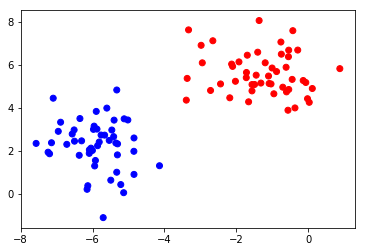

In [2]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')

In [3]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')

    y_mesh = np.dot(x_mesh, w.T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

### Python

step 0: 5
step 100: 0
step 200: 0
step 300: 0
step 400: 0
step 500: 0
step 600: 0
step 700: 0
step 800: 0
step 900: 0
step 1000: 0
w:  [0.35895815754250915, 0.46789094900480527]
b:  -0.513803960901


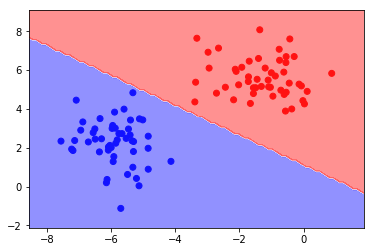

In [4]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1e-2

for step in range(1001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([w[d]*x_i[d] for d in range(D)]) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_i[0] - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        sum_error += error
        
    if step%100 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print('w: ', w)
print('b: ', b)

plot_linear_classifier(x, y, np.array(w), b)

### Numpy

step 0: [[-1]]
step 10: [[0]]
step 20: [[0]]
step 30: [[0]]
step 40: [[0]]
step 50: [[0]]
w:  [[ 0.10955966  0.00220932]]
b:  [[ 0.44647194]]


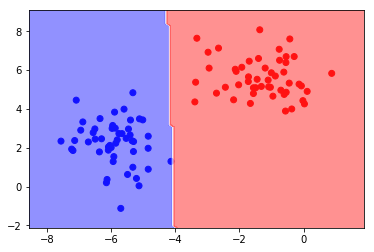

In [5]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(51):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        y_pred = np.where(y_pred > 0, 1, 0)
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        sum_error += error
    
    if step%10 == 0:
        print('step {0}: {1}'.format(step, sum_error))
    
print('w: ', w)
print('b: ', b)

plot_linear_classifier(x, y, w, b)

### Keras

In [6]:
D = x.shape[1]

model = Sequential()
model.add(Dense(units=1, activation='linear', input_dim=D))
model.compile(loss='categorical_hinge', optimizer='sgd')

0.0242258682847
[[ 0.44433466]
 [ 0.427288  ]] [-0.09169987]


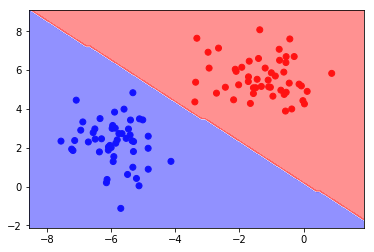

In [7]:
model.fit(x, y, epochs=100, batch_size=x.shape[0], verbose=0)
y_pred = model.predict(x, verbose=0)
error = model.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model.get_weights()
print(error)
print(w,b)

plot_linear_classifier(x, y, w.reshape(1, 2), b)

### Tensorflow

In [8]:
D = x.shape[1]

learning_rate = 1e-2
tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    g_x = tf.placeholder(dtype=tf.float64, shape=(None, D))
    g_y = tf.placeholder(dtype=tf.float64)
    
    g_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    g_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(g_x, g_w, transpose_b=True), g_b)
    y_pred_bin = tf.where(y_pred > 0, tf.ones_like(y_pred), tf.zeros_like(y_pred))
    g_error = tf.subtract(g_y, y_pred_bin)
    
    delta = tf.matmul(g_error, g_x, transpose_a=True)
    train_w = tf.assign(g_w, tf.add(g_w, learning_rate*delta))
    train_b = tf.assign(g_b, tf.add(g_b, learning_rate*tf.squeeze(g_error)))

step 0: [[ 17.]]
step 10: [[ 0.]]
step 20: [[ 0.]]
step 30: [[ 0.]]
step 40: [[ 0.]]
step 50: [[ 0.]]
w:  [[ 0.07741908  0.07324721]]
b:  [ 0.01032135]


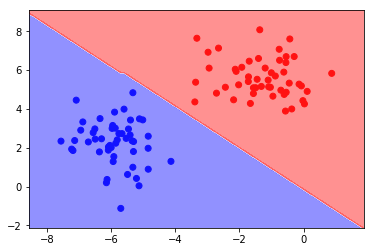

In [9]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(51):
        sum_error = 0
        for x_i, y_i in zip(x, y):
            feed_dict = {g_x:x_i.reshape((1,D)), g_y:y_i}
            error, _, _ = sess.run([g_error, train_w, train_b], feed_dict=feed_dict)
            sum_error += error

        if step%10 == 0:
            print('step {0}: {1}'.format(step, sum_error))
    
    print('w: ', g_w.eval())
    print('b: ', g_b.eval())
    plot_linear_classifier(x, y, g_w.eval(), g_b.eval())

# Regressão 

Para transformar o Perceptron em um __regressor linear__, só o que temos de fazer é __remover a função de ativação _step___, transformando-a em uma função de ativação linear.

Apesar dessa modificação, __a fórmula de atualização dos pesos não sofre nenhuma alteração__. 

Vamos, então, implementar nosso perceptron para classificação em Python, Numpy, Keras e TensorFlow:

In [2]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


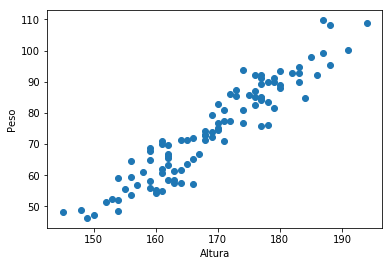

In [3]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [4]:
print(x.shape, y.shape)

(100,) (100,)


In [5]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(100, 1) (100, 1)


### Python

__Exercício__: tentar estimar as learning_rates de __w__ e __b__. Elas são diferentes por que nossos dados não estão na mesma escala!

In [6]:
D = x.shape[1]
w = 2*random() - 1 # [1xD]
b = 2*random() - 1 # [1x1]

for step in range(10001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = x_i*w + b
        error = y_i[0] - y_pred
        w = w + 1e-7*error*x_i
        b = b + 1e-2*error
        sum_error += error

    if step%1000 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print('w: ', w)
print('b: ', b)

step 0: [-744.99321487]
step 1000: [-5.35154605]
step 2000: [-2.24574917]
step 3000: [-0.94241726]
step 4000: [-0.39548062]
step 5000: [-0.16596144]
step 6000: [-0.06964488]
step 7000: [-0.02922612]
step 8000: [-0.01226459]
step 9000: [-0.00514677]
step 10000: [-0.00215982]
w:  [ 1.36984015]
b:  [-157.88819668]


### Numpy 

In [7]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1xD]
b = 2*np.random.random()-1       # [1x1]

for step in range(10001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        error = y_i - y_pred 
        w = w + 1e-7*np.dot(error.T, x_i)
        b = b + 1e-2*error
        sum_error += error
    
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, sum_error))
    
print('w: ', w)
print('b: ', b)

step 0: [[ 139.99392305]]
step 1000: [[-5.85142582]]
step 2000: [[-2.45552118]]
step 3000: [[-1.03044702]]
step 4000: [[-0.43242187]]
step 5000: [[-0.18146364]]
step 6000: [[-0.0761503]]
step 7000: [[-0.03195609]]
step 8000: [[-0.01341021]]
step 9000: [[-0.00562753]]
step 10000: [[-0.00236156]]
w:  [[ 1.36982625]]
b:  [[-157.88587436]]


### Numpy com Pré-processamento

In [8]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 1.0


In [9]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [[ 33.60164767]]
b:  [ 74.99636287]


In [10]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1xD]
b = 2*np.random.random()-1       # [1x1]

learning_rate = 1e-3

for step in range(1001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        sum_error += error
    
    if step%100 == 0:
        print('step {0}: {1}'.format(step, sum_error))
    
print('w: ', w)
print('b: ', b)

step 0: [[ 7133.69077877]]
step 100: [[ 3.50962233]]
step 200: [[ 0.49157641]]
step 300: [[ 0.07573886]]
step 400: [[ 0.01166969]]
step 500: [[ 0.00179804]]
step 600: [[ 0.00027704]]
step 700: [[  4.26854973e-05]]
step 800: [[  6.57688611e-06]]
step 900: [[  1.01336102e-06]]
step 1000: [[  1.56138007e-07]]
w:  [[ 33.60180845]]
b:  [[ 74.93896427]]


### Keras 

In [11]:
D = x.shape[1]

model = Sequential()
model.add(Dense(units=1, activation='linear', input_shape=(D,)))
model.compile(loss='mse', optimizer='sgd')

In [12]:
model.fit(x, y, batch_size=x.shape[0], epochs=2000, verbose=0)
error = model.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model.get_weights()

print('erro: ', error)
print('w: ', w)
print('b: ', b)

erro:  26.0829849243
w:  [[ 33.5825119]]
b:  [ 74.99577332]


### TensorFlow 

In [13]:
D = x.shape[1]

learning_rate = 1e-3
tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    g_x = tf.placeholder(dtype=tf.float64, shape=(1, D))
    g_y = tf.placeholder(dtype=tf.float64, shape=(1,))
    
    g_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    g_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(g_x, g_w, transpose_b=True), g_b)
    g_error = tf.subtract(g_y, y_pred)
    
    delta = tf.matmul(g_error, g_x, transpose_a=True)
    train_w = tf.assign(g_w, tf.add(g_w, learning_rate*delta))
    train_b = tf.assign(g_b, tf.add(g_b, learning_rate*tf.squeeze(g_error)))

In [14]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(1001):
        sum_error = 0
        for x_i, y_i in zip(x, y):
            feed_dict = {g_x:x_i.reshape((1,D)), g_y:y_i}
            error, _, _ = sess.run([g_error, train_w, train_b], feed_dict=feed_dict)
            sum_error += error

        if step%100 == 0:
            print('step {0}: {1}'.format(step, sum_error))
    
    print('w: ', g_w.eval())
    print('b: ', g_b.eval())

step 0: [[ 6997.09817665]]
step 100: [[ 3.45957272]]
step 200: [[ 0.48480729]]
step 300: [[ 0.07469593]]
step 400: [[ 0.01150899]]
step 500: [[ 0.00177328]]
step 600: [[ 0.00027322]]
step 700: [[  4.20977155e-05]]
step 800: [[  6.48632065e-06]]
step 900: [[  9.99397777e-07]]
step 1000: [[  1.54009314e-07]]
w:  [[ 33.60180845]]
b:  [ 74.93896427]


## Exercício de Regressão

In [2]:
df = pd.read_csv('data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


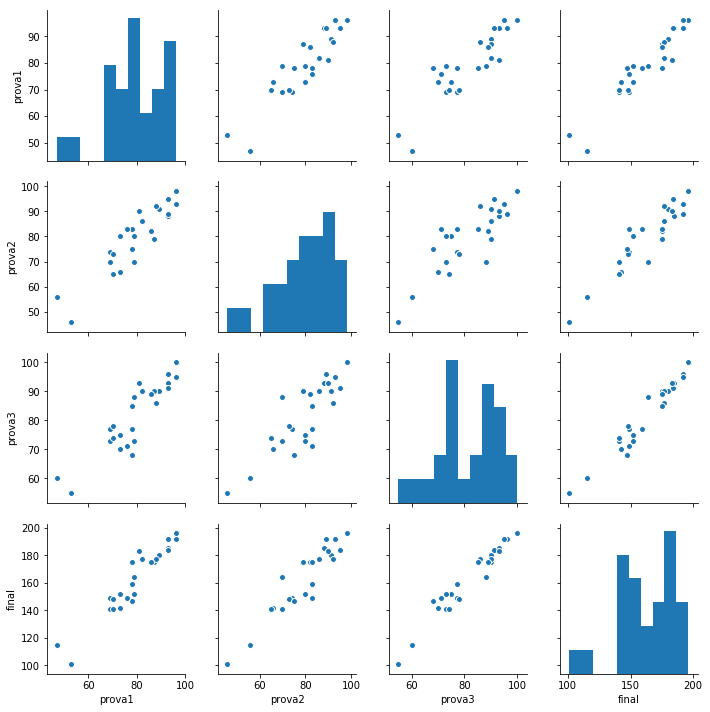

In [3]:
sb.pairplot(df)

In [4]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values.reshape(-1, 1)

print(x.shape, y.shape)

(25, 3) (25, 1)


In [5]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [6]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [[  8.72048636  14.1054877   26.26749487]]
b:  [ 150.65175754]


### Python

In [7]:
D = x.shape[1]
w = [2*random() - 1 for d in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1e-2

for step in range(2001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([x_i[d]*w[d] for d in range(D)]) + b
        error = y_i[0] - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        sum_error += error
        
    if step%200 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print('w: ', w)
print('b: ', b)

step 0: 3518.8665053536233
step 200: 0.49625602835646987
step 400: 0.10109276772551823
step 600: 0.024367616042098916
step 800: 0.00689688231543073
step 1000: 0.002186535009684576
step 1200: 0.0007389606869736554
step 1400: 0.0002577110489454526
step 1600: 9.117912874501144e-05
step 1800: 3.24658691397417e-05
step 2000: 1.1592239047786279e-05
w:  [8.7252065625174904, 14.139481266327527, 26.320506965816165]
b:  150.71119293


### Numpy

In [8]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(2001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        sum_error += error
    
    if step%200 == 0:
        print('step {0}: {1}'.format(step, sum_error))
    
print('w: ', w)
print('b: ', b)

step 0: [[ 3506.39890645]]
step 200: [[ 0.49820857]]
step 400: [[ 0.10163896]]
step 600: [[ 0.02453952]]
step 800: [[ 0.00695476]]
step 1000: [[ 0.00220668]]
step 1200: [[ 0.00074608]]
step 1400: [[ 0.00026025]]
step 1600: [[  9.20842857e-05]]
step 1800: [[  3.27894324e-05]]
step 2000: [[  1.17079653e-05]]
w:  [[  8.7252108   14.13947853  26.32050535]]
b:  [[ 150.7111927]]


### Keras

In [10]:
D = x.shape[1]

model = Sequential()
model.add(Dense(units=1, activation='linear', input_shape=(D,)))
model.compile(loss='mse', optimizer='sgd')

In [11]:
model.fit(x, y, batch_size=x.shape[0], epochs=5000, verbose=0)
error = model.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model.get_weights()

print('erro: ', error)
print('w: ', w)
print('b: ', b)

erro:  5.81595468521
w:  [[ 10.23342609]
 [ 13.57037544]
 [ 25.28876114]]
b:  [ 150.5090332]


### Tensorflow

In [12]:
D = x.shape[1]

learning_rate = 1e-2
tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    g_x = tf.placeholder(dtype=tf.float64, shape=(1, D))
    g_y = tf.placeholder(dtype=tf.float64, shape=(1,))
    
    g_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    g_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(g_x, g_w, transpose_b=True), g_b)
    g_error = tf.subtract(g_y, y_pred)
    
    delta = tf.matmul(g_error, g_x, transpose_a=True)
    train_w = tf.assign(g_w, tf.add(g_w, learning_rate*delta))
    train_b = tf.assign(g_b, tf.add(g_b, learning_rate*tf.squeeze(g_error)))

In [13]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sum_error = 0
        for x_i, y_i in zip(x, y):
            feed_dict = {g_x:x_i.reshape((1,D)), g_y:y_i}
            error, _, _ = sess.run([g_error, train_w, train_b], feed_dict=feed_dict)
            sum_error += error

        if step%200 == 0:
            print('step {0}: {1}'.format(step, sum_error))
    
    print('w: ', g_w.eval())
    print('b: ', g_b.eval())

step 0: [[ 3496.06652715]]
step 200: [[ 0.50199167]]
step 400: [[ 0.10228667]]
step 600: [[ 0.02466231]]
step 800: [[ 0.00698187]]
step 1000: [[ 0.00221379]]
step 1200: [[ 0.00074823]]
step 1400: [[ 0.00026095]]
step 1600: [[  9.23267802e-05]]
step 1800: [[  3.28747277e-05]]
step 2000: [[  1.17382587e-05]]
w:  [[  8.7252119   14.13947781  26.32050493]]
b:  [ 150.71119265]


# Referências

- [Artigo original do Perceptron](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf)